- Conditional Independence makes it possible for us to measure an effect on the outcome solely due to the treatment and not any other variable lurking around.

## Causal Graphical Models

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

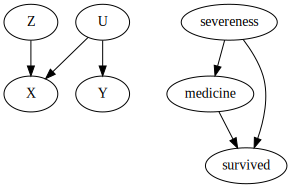

In [17]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

- We use arrows or edges to show if a variable causes another 
- Z causes X. U causes X and Y
- Severeness causes both medicine and survival, and medicine also causes survival

## Crash Course in Graphical Models

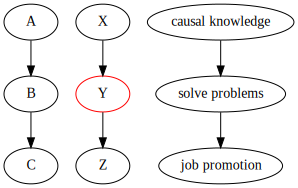

In [18]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

- Knowing about causal inference is the only way to solve business problems, and solving those problems is the only way to get a job promotion. 
- So causal knowledge implies solving issues that cause a job promotion.
    - We can say here that job promotion is dependent on causal knowledge 
- If we condition on the intermediary variable, X and Z are independent given Y.

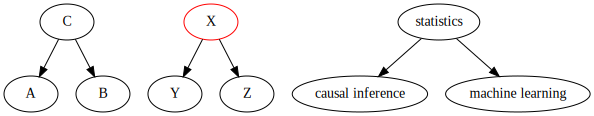

In [19]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

- Let's say the knowledge of statistics causes you to know more about causal inference and machine learning.
    - If you are good at causal inference, you are probably good at statistics, making it more likely that you are good at machine learning.
- If we condition on the knowledge about statistics, then how much you know about machine learning becomes independent of how much you know about causal inference.

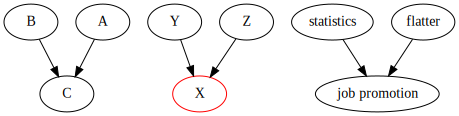

In [20]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

- If we don't condition on the job promotion, knowing how good you are at statistics tells us nothing about how good you are at flattering. 
- On the other hand, if you did get a job promotion, knowing your level of statistics tells me about your flattering level.
    - If you are bad at statistics and did get a promotion, you will likely know how to flatter